In [1]:
from individual_data_formatter import generate_formatted_children_under_five 

In [2]:
individual_recode = generate_formatted_children_under_five()

/Users/saheedfaremi/Library/CloudStorage/OneDrive-Etihuku/malariaDemographic/modelling/individual_data_formatter.py:12: DtypeWarning: Columns (48,65,74,82,84,85,86,87,88,89,90,91,128,129,130,131,132,133,134,135,136,142,143,149,150,163,164,198,199,203,204,205,206,212,213,220,228,234) have mixed types. Specify dtype option on import or set low_memory=False.
  individual_recode = pd.read_csv('../data/generate/individual_house_hold_recode.csv')


In [3]:
household_Information = [
    'HV004    Ultimate area unit',
    'HV009    Number of household members', 'HV010    Number of eligible women in household',
    'HV012    Number of de jure members', 'HV013    Number of de facto members',
    'HV014    Number of children 5 and under (de jure)', 
]
household_characteristics = [
    'HV204    Time to get to water source (minutes)', 'HV205    Type of toilet facility', 'HV206    Has electricity',
    'HV207    Has radio', 'HV208    Has television', 'HV209    Has refrigerator', 'HV210    Has bicycle',
    'HV211    Has motorcyclescooter', 'HV212    Has cartruck', 'HV213    Main floor material',
    'HV214    Main wall material', 'HV215    Main roof material', 'HV216    Number of rooms used for sleeping',
    'HV219    Sex of head of household', 'HV220    Age of head of household',
    'HV221    Has telephone (land-line)', 'HV222    Type of cookstove', 'HV225    Share toilet with other households',
    'HV227    Has mosquito bed net for sleeping', 'HV228    Children under 5 slept under mosquito bed net last night',
    'HV235    Location of source for water', 'HV238    Number of households sharing toilet',
    'HV244    Owns land usable for agriculture', 'HV245    Hectares of agricultural land (1 decimal)',
    'HV246    Owns livestock, herds or farm animals', 'HV247    Has bank account', 'HV270    Wealth index combined',
    'HV222    Type of cookstove', 'HV227    Has mosquito bed net for sleeping',
    'HV228    Children under 5 slept under mosquito bed net last night', 'HV238    Number of households sharing toilet',
    'HV245    Hectares of agricultural land (1 decimal)', 'HV246    Owns livestock, herds or farm animals',
    'HV246A   Owns cattle', 'HV246B   Owns cows bulls', 'HV246C   Owns horses donkeys mules', 'HV246D   Owns goats',
    'HV246E   Owns sheep', 'HV246F   Owns chickenspoultry', 'HV246G   Owns pigs', 'HV246H   Owns camels'
]


bed_net_usage_and_malaria = [
    'HML1     Number of mosquito bed nets'
]

socio_economic_factors = household_Information + household_characteristics + bed_net_usage_and_malaria
#removing duplicates
socio_economic_factors = sorted(set(socio_economic_factors))

In [4]:
demographic_factors = [
    'HV009    Number of household members', 'HV010    Number of eligible women in household',
    'HV012    Number of de jure members', 'HV013    Number of de facto members',
    'HV014    Number of children 5 and under (de jure)',
    'HV220    Age of head of household',
    'HV219    Sex of head of household'
]
demographic_factors = sorted(set(demographic_factors))

In [5]:
demo_socio_data = individual_recode[sorted(set(demographic_factors + socio_economic_factors))]

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in demo_socio_data.select_dtypes(include=['object']).columns:
    demo_socio_data[column] = label_encoder.fit_transform(demo_socio_data[column])

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_76595/2025143192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_socio_data[column] = label_encoder.fit_transform(demo_socio_data[column])
/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_76595/2025143192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_socio_data[column] = label_encoder.fit_transform(demo_socio_data[column])
/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_76595/2025143192.py:5: SettingWithCopyW

In [7]:
demo_socio_data = demo_socio_data.fillna(demo_socio_data.mean())
demo_socio_data.isnull().sum()

HML1     Number of mosquito bed nets                                 0
HV004    Ultimate area unit                                          0
HV009    Number of household members                                 0
HV010    Number of eligible women in household                       0
HV012    Number of de jure members                                   0
HV013    Number of de facto members                                  0
HV014    Number of children 5 and under (de jure)                    0
HV204    Time to get to water source (minutes)                       0
HV205    Type of toilet facility                                     0
HV206    Has electricity                                             0
HV207    Has radio                                                   0
HV208    Has television                                              0
HV209    Has refrigerator                                            0
HV210    Has bicycle                                                 0
HV211 

In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

target = 'HML32$01 Final result of malaria from blood smear test'

X = demo_socio_data  # we only take the first two features for visualization
y = individual_recode[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


n_features = X_train.shape[1]

random_state=0
seed = 1111

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L1 logistic (Multinomial)': LogisticRegression(C=C, penalty='l1',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                      random_state=0),
    # 'GPC': GaussianProcessClassifier(kernel)
}



In [14]:
X_train.shape

(8524, 42)

In [15]:
X_test.shape

(2131, 42)

In [16]:
n_classifiers = len(classifiers)
for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

Accuracy (train) for L1 logistic: 79.1% 
Accuracy (train) for L1 logistic (Multinomial): 79.1% 
Accuracy (train) for L2 logistic (Multinomial): 79.1% 
Accuracy (train) for L2 logistic (OvR): 79.1% 
Accuracy (train) for Linear SVC: 74.4% 


/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='n

>0.0000 0.788 (0.003)


/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

>0.0001 0.790 (0.001)


/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

>0.0010 0.790 (0.002)


/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

>0.0100 0.789 (0.004)


/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

>0.1000 0.788 (0.004)


/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

>1.0000 0.788 (0.004)


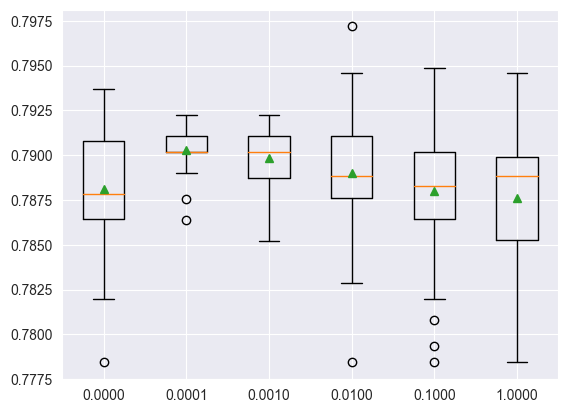

In [17]:
from matplotlib import pyplot
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from numpy import mean
from numpy import std

# get a list of models to evaluate
def get_models():
	_models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			_models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			_models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return _models
 
# evaluate a give model using cross-validation
def evaluate_model(_model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show();

In [20]:
print(results.intercept_)
print(results.coef_)

AttributeError: 'list' object has no attribute 'coef_'